In [20]:
import sys
import os
import torch
from torch import dtype
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\gans")
from gan import *
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

dtype = float
device = torch.device("cpu")

In [21]:
BATCH_SIZE = 128
LEARNING_RATE = 0.0002
LATENT_DIM = 100

In [26]:
#MNIST dataset
def mnist_load():
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((.5), (.5)),
                                    transforms.Lambda(image2vec)])
    return datasets.MNIST(root='./dataset', train=True, transform=transform, download=True)


def image2vec(image):
    return image.view(image.size(0), 784)


def vec2image(vector):
    return vector.view(vector.size(0), 1, 28, 28)

In [27]:
data = mnist_load()
data_loader = torch.utils.data.DataLoader(data, batch_size=BATCH_SIZE, shuffle=True)

In [28]:
advNet = GAN(LATENT_DIM,device)

In [29]:
advNet.train(data_loader, batch_size=BATCH_SIZE, epochs=200)

Epoch 0: Discriminator loss: 0.3762995824654664 | Generator loss: 4.296645958731169
Epoch 1: Discriminator loss: 0.3327813576668628 | Generator loss: 4.053948852998107
Epoch 2: Discriminator loss: 0.4283573718658134 | Generator loss: 2.086999021232255
Epoch 3: Discriminator loss: 0.3416394603246056 | Generator loss: 2.651141822719371
Epoch 4: Discriminator loss: 0.30377158770429047 | Generator loss: 2.7161714418102174
Epoch 5: Discriminator loss: 0.21195236170914636 | Generator loss: 3.4601254125139604
Epoch 6: Discriminator loss: 0.25262668568378827 | Generator loss: 2.9751778780016056
Epoch 7: Discriminator loss: 0.26711692926344843 | Generator loss: 2.5580148102123856
Epoch 8: Discriminator loss: 0.3012114454751838 | Generator loss: 2.5813735540487617
Epoch 9: Discriminator loss: 0.277206132851684 | Generator loss: 2.6471720283219553
Epoch 10: Discriminator loss: 0.31911567771739796 | Generator loss: 2.42350338135701
Epoch 11: Discriminator loss: 0.2992269531496044 | Generator loss:

Epoch 96: Discriminator loss: 0.6063597047252696 | Generator loss: 1.0041756205467274
Epoch 97: Discriminator loss: 0.6119988727162896 | Generator loss: 0.9922381809779576
Epoch 98: Discriminator loss: 0.61109493777696 | Generator loss: 0.9848139010258575
Epoch 99: Discriminator loss: 0.6109245997756275 | Generator loss: 0.9965792813026575
Epoch 100: Discriminator loss: 0.6163390813860049 | Generator loss: 0.9725030687317919
Epoch 101: Discriminator loss: 0.615511940232218 | Generator loss: 0.9626938550711186
Epoch 102: Discriminator loss: 0.6108943881002317 | Generator loss: 0.9954904763937504
Epoch 103: Discriminator loss: 0.6107994940108074 | Generator loss: 0.9872823361394756
Epoch 104: Discriminator loss: 0.6149623275819872 | Generator loss: 0.9798004422614823
Epoch 105: Discriminator loss: 0.6160660328895553 | Generator loss: 0.959212919542276
Epoch 106: Discriminator loss: 0.6178829129825014 | Generator loss: 0.9635287796510562
Epoch 107: Discriminator loss: 0.6152305366642186 |

Epoch 191: Discriminator loss: 0.6403491484330915 | Generator loss: 0.8886000479716482
Epoch 192: Discriminator loss: 0.6372499439253736 | Generator loss: 0.8996388411471076
Epoch 193: Discriminator loss: 0.637008316100025 | Generator loss: 0.9035498977724169
Epoch 194: Discriminator loss: 0.6399955932519583 | Generator loss: 0.8867673068158408
Epoch 195: Discriminator loss: 0.6405196038644705 | Generator loss: 0.8812903599190051
Epoch 196: Discriminator loss: 0.6379881765542508 | Generator loss: 0.8953368923048983
Epoch 197: Discriminator loss: 0.6406392644463318 | Generator loss: 0.8903078699925306
Epoch 198: Discriminator loss: 0.6364609428814479 | Generator loss: 0.8953947319404911
Epoch 199: Discriminator loss: 0.6412405357686187 | Generator loss: 0.8826016313485754


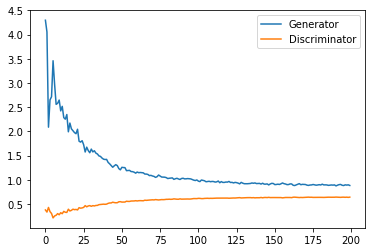

In [33]:
plt.plot(advNet.history['Generator'], label="Generator")
plt.plot(advNet.history['Discriminator'], label='Discriminator')
plt.legend(loc='best')
plt.show()

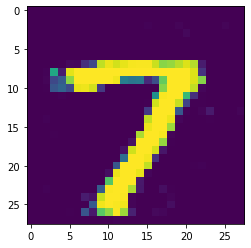

In [51]:
pred = advNet.generate(1)
plt.imshow(vec2image(pred).detach().numpy()[0].reshape(28,28,1))